In [1]:
from os import environ, makedirs

input_folder = environ.get('CROSSCOMPUTE_INPUT_FOLDER', 'tests/standard/input')
output_folder = environ.get('CROSSCOMPUTE_OUTPUT_FOLDER', 'tests/standard/output')
try:
    makedirs(output_folder)
except IOError:
    pass

In [2]:
import json
from os.path import join

settings_path = join(input_folder, 'settings.json')
d = json.load(open(settings_path, 'rt'))
d

{'name': 'USA_MO_Springfield.Rgnl.AP'}

In [3]:
name = d['name']
name

'USA_MO_Springfield.Rgnl.AP'

In [4]:
datasets_folder = '../../datasets'
residential_folder = join(datasets_folder, 'RESIDENTIAL_LOAD_DATA_E_PLUS_OUTPUT')

In [5]:
import arrow
import pandas as pd

def parse_timestamp(timestamp):
    return arrow.get('2000 ' + timestamp.strip(), 'YYYY MM/DD  HH:mm:ss').datetime

parse_timestamp(' 01/01  24:00:00')

datetime.datetime(2000, 1, 2, 0, 0, tzinfo=tzutc())

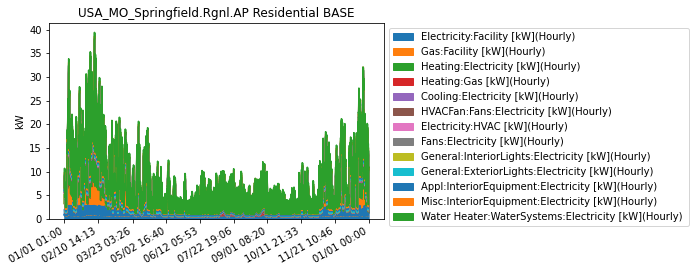

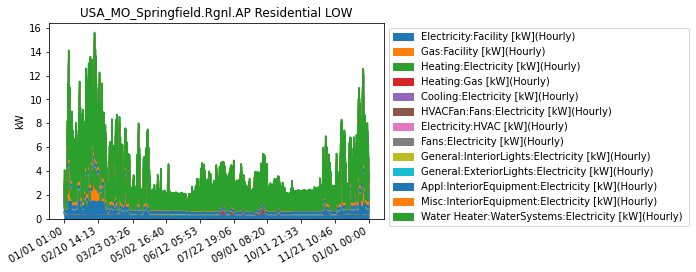

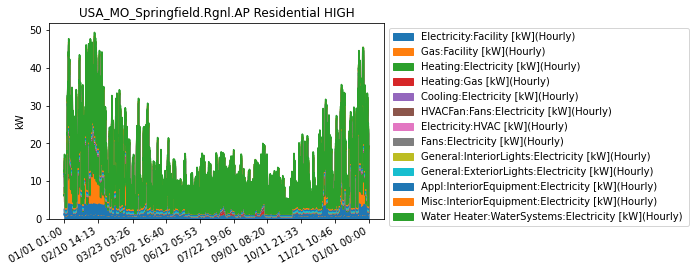

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from glob import glob

level_categories = 'BASE', 'LOW', 'HIGH'
for level_category in level_categories:
    table_path = glob(join(residential_folder, level_category, name + '.*'))[0]
    t = pd.read_csv(
        table_path,
        parse_dates=['Date/Time'],
        date_parser=parse_timestamp)
    t.set_index('Date/Time', drop=True, inplace=True)
    # Save description
    t.describe().to_csv(join(
        output_folder, f'residential-{level_category.lower()}-description.csv'))
    # Save plot
    datetime_series = pd.Series(t.index)
    x_values = datetime_series.quantile(np.linspace(0, 1, num=10))
    x_labels = [_.strftime('%m/%d %H:%M') for _ in x_values]
    ax = t.plot.area()
    ax.set_title(name + ' Residential ' + level_category)
    ax.legend(bbox_to_anchor=(1, 1))
    plt.xticks(x_values, x_labels, rotation=30)
    plt.xlabel('')
    plt.ylabel('kW')
    ax.plot()
    plt.savefig(join(output_folder, f'residential-{level_category.lower()}.png'))